## Modelo 

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

In [2]:
X_correct = np.load('../Data/Processed/correct_push_ups_landmarks.npy')
X_incorrect = np.load('../Data/Processed/wrong_push_ups_landmarks.npy')

X = np.vstack((X_correct, X_incorrect))
y = np.array([1]*X_correct.shape[0] + [0]*X_incorrect.shape[0])  

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape[1]

160

In [5]:
timesteps = X_train.shape[1]  # 200 frames (numero de frames por secuencia)
features = X_train.shape[2]   # 66 valores por frame

model = Sequential()
model.add(Masking(mask_value=0., input_shape=(timesteps, features)))  # ignorar padding
model.add(LSTM(64, return_sequences=False))  # 64 unidades LSTM, solo devolvemos la última salida
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))    # salida binaria

/opt/miniconda3/envs/ex-ml/lib/python3.12/site-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=16
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4375 - loss: 0.7065 - val_accuracy: 0.5625 - val_loss: 0.6919
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6094 - loss: 0.6853 - val_accuracy: 0.6250 - val_loss: 0.6905
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6719 - loss: 0.6734 - val_accuracy: 0.6875 - val_loss: 0.6734
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.6646 - val_accuracy: 0.6875 - val_loss: 0.6457
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7656 - loss: 0.6489 - val_accuracy: 0.7500 - val_loss: 0.6119
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7188 - loss: 0.6096 - val_accuracy: 0.7500 - val_loss: 0.5677
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7188 - loss: 0.5738 - val_accuracy: 0.6875 - val_loss: 0.5651
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7812 - loss: 0.5866 - val_accuracy: 0.8125 - val_loss: 0.5043


In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.7500 - loss: 0.5757
Test Accuracy: 0.75


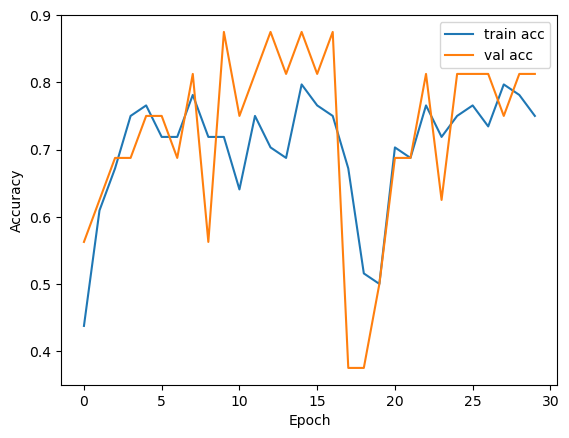

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()